## Linear Regression and Multicollinearity


In this tutorial, we will illustrate the effects of **multicollinearity** in a linear regression model using a real-world example. 

We will use the **statsmodels** library to fit the model, identify multicollinearity, and resolve it. The example involves predicting house prices based on three predictors:

- Square footage (`X1`)
- Number of bedrooms (`X2`)
- Total area (`X3`) – which includes square footage and additional spaces like a garage (highly correlated with `X1`).
    

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

%config InlineBackend.figure_format = 'retina'

plt.style.use("seaborn-v0_8")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

np.set_printoptions(suppress=True)

In [2]:
import statsmodels.api as sm

# Create the dataset
data = {
    "Price": [410000, 620000, 780000, 770000, 980000],
    "Square_Footage": [159, 210, 245, 310, 365],
    "Bedrooms": [3, 4, 5, 4, 5],
    "Total_Area": [175, 225, 275, 325, 375],
}

# Convert to DataFrame
df = pd.DataFrame(data)

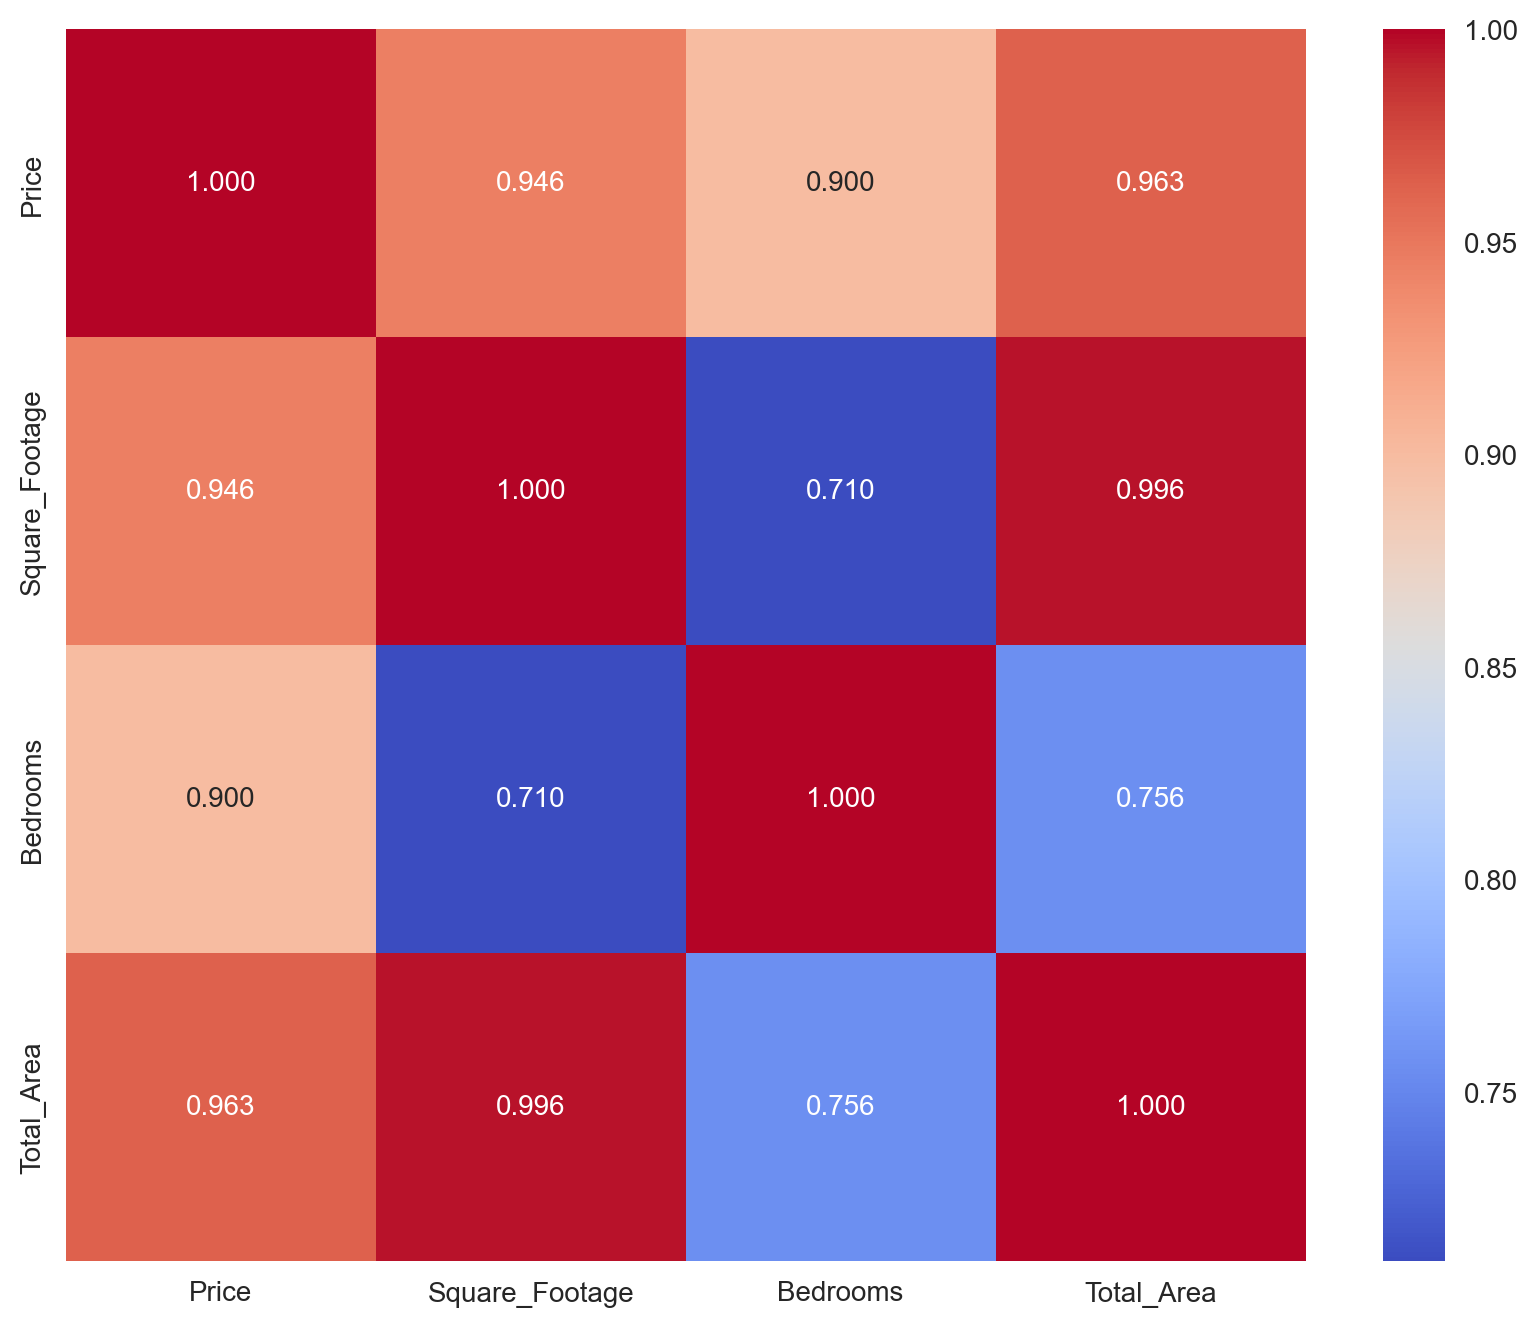

In [3]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f")
plt.show()

In [4]:
# Add a constant (intercept) to the model
df["Intercept"] = 1
df.head()  # Show the first few rows of the dataset

,Price,Square_Footage,Bedrooms,Total_Area,Intercept
0,410000,159,3,175,1
1,620000,210,4,225,1
2,780000,245,5,275,1
3,770000,310,4,325,1
4,980000,365,5,375,1



### Model 1: Regression with Multicollinearity

We'll first fit a linear regression model that includes both `Square Footage` and `Total Area`, which introduces multicollinearity. This will help us see the problems caused by multicollinearity.
    

In [5]:
# Model 1: With multicollinearity (including both Square Footage and Total Area)
X1 = df[["Intercept", "Square_Footage", "Bedrooms", "Total_Area"]]
y = df["Price"]

# Fit the model
model1 = sm.OLS(y, X1).fit()

# Print the summary of the model with multicollinearity
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2249.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):             0.0155
Time:                        09:47:55   Log-Likelihood:                -45.812
No. Observations:                   5   AIC:                             99.62
Df Residuals:                       1   BIC:                             98.06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.895e+05   1.34e+04    -14.139      0.045    -3.6e+05   -1.92e+04
Square_Footage  2526.5957    515.024      4.906      0.128   -4017.409    9070.601
Bedrooms        1.261e+05   6851.954     18.402      0.035     3.9e+04    2.13e+05
Total_Area     -1015.9574    569.397     -1.784      0.325   -8250.838    6218.923
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.755
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.589
Skew:                           0.221   Prob(JB):                        0.745
Kurtosis:                       1.377   Cond. No.                     2.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Key Takeaways from Model 1:

- Notice the unexpected **negative coefficient** for `Total Area` and the **positive coefficient** for `Square Footage`. This indicates a distortion in the regression results due to the high correlation between these two variables.
- Multicollinearity is inflating the standard errors and making it hard to interpret the real effects of each predictor.
- The signs of the coefficients and their magnitudes are unreliable due to the high collinearity.


### Model 2: Regression without Multicollinearity

Now, let's refit the model without `Total Area` to reduce multicollinearity and observe the improvement in the regression results.
    

In [6]:
# Model 2: Without multicollinearity (removing Total Area)
X2 = df[["Intercept", "Square_Footage", "Bedrooms"]]

# Fit the model
model2 = sm.OLS(y, X2).fit()

# Print the summary of the model without multicollinearity
model2.summary()

/Users/davidakman/Documents/ML_Teaching/.venv/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1612.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           0.000620
Time:                        09:47:55   Log-Likelihood:                -49.390
No. Observations:                   5   AIC:                             104.8
Df Residuals:                       2   BIC:                             103.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.934e+05   1.91e+04    -10.112      0.010   -2.76e+05   -1.11e+05
Square_Footage  1611.1790     65.177     24.720      0.002    1330.743    1891.615
Bedrooms        1.167e+05   6331.997     18.428      0.003    8.94e+04    1.44e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.886
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.716
Skew:                           0.841   Prob(JB):                        0.699
Kurtosis:                       2.220   Cond. No.                     1.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Key Takeaways from Model 2:

- After removing the collinear variable Total Area, the coefficient for Square Footage is now more stable and positive, which makes sense in predicting house prices.
- Multicollinearity issues have been resolved, leading to more interpretable results.

### Conclusions:
- **Multicollinearity** can distort regression results by inflating standard errors and producing unstable coefficients.
- Removing or addressing multicollinearity results in a more interpretable and stable model.
- By removing the multicollinear variable (`Total Area`), the coefficients become more stable and interpretable. 
- In practical scenarios, reducing multicollinearity helps in making the model more reliable for interpretation and prediction.

***